In [809]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import cufflinks as cf 

In [810]:
df = pd.read_csv("df_criado_final (1).csv")

In [811]:
df.head()

,Escolaridade,Renda Mensal Informal,Dependentes,Estado Civil,Idade,Conta Poupanca,Conta Salario,Quant Adiantamento Deposito,Qtd Fonte Renda,Cheque Sem Fundo,Conta Conjunta,Valor Conta Corrente,Valor Conta Poupanca,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Data,Estado
0,NaN,NaN,S,2,36,S,N,NaN,NaN,N,N,NaN,NaN,8174.32,263.25,5844.98,14282.55,1,1,1328587.0,1,2020-01-01,57
1,1.0,1894.5078,N,2,39,S,N,2.0,1.0,S,N,NaN,NaN,41775.63,1607.29,7652.26,51035.18,1,1,1424254.0,1,2020-01-01,59
2,1.0,NaN,S,2,26,S,N,NaN,1.0,S,N,NaN,NaN,522940.27,24860.40,319315.62,867116.29,1,1,1438519.0,0,2020-01-01,56
3,NaN,NaN,N,8,23,N,N,NaN,NaN,N,N,NaN,NaN,1593.00,21472.36,2967.48,26032.84,1,1,1426138.0,1,2020-01-01,56
4,NaN,NaN,S,2,33,S,N,NaN,NaN,N,N,NaN,NaN,2078.97,19.44,46.35,2144.76,1,1,1474504.0,0,2020-01-01,59


In [812]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50390 entries, 0 to 50389
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Escolaridade                 14615 non-null  float64
 1   Renda Mensal Informal        9768 non-null   float64
 2   Dependentes                  50390 non-null  object 
 3   Estado Civil                 50390 non-null  int64  
 4   Idade                        50390 non-null  int64  
 5   Conta Poupanca               50390 non-null  object 
 6   Conta Salario                50390 non-null  object 
 7   Quant Adiantamento Deposito  21843 non-null  float64
 8   Qtd Fonte Renda              12806 non-null  float64
 9   Cheque Sem Fundo             50390 non-null  object 
 10  Conta Conjunta               50390 non-null  object 
 11  Valor Conta Corrente         0 non-null      float64
 12  Valor Conta Poupanca         0 non-null      float64
 13  Valor Emprestimo

In [813]:
df.describe()

,Escolaridade,Renda Mensal Informal,Estado Civil,Idade,Quant Adiantamento Deposito,Qtd Fonte Renda,Valor Conta Corrente,Valor Conta Poupanca,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado,PAGO,Controle,ID,Genero,Estado
count,14615.000000,9768.000000,50390.000000,50390.000000,21843.000000,12806.000000,0.0,0.0,5.039000e+04,5.039000e+04,5.039000e+04,5.039000e+04,50390.000000,50390.0,5.039000e+04,50390.000000,50390.000000
mean,1.175573,4635.610641,3.503354,31.724529,2.104931,1.241605,NaN,NaN,5.198927e+04,6.022658e+04,6.485391e+04,1.721779e+05,0.790891,1.0,3.740829e+09,0.498333,57.498055
std,0.508951,24776.361024,2.132091,8.565117,0.898459,0.496176,NaN,NaN,1.588819e+06,2.843941e+06,2.728170e+06,7.058290e+06,0.406676,0.0,7.248462e+09,0.500002,1.118008
min,1.000000,0.009600,1.000000,18.000000,1.000000,1.000000,NaN,NaN,1.431000e+03,0.000000e+00,0.000000e+00,1.441500e+03,0.000000,1.0,1.168846e+06,0.000000,56.000000
25%,1.000000,28.173400,2.000000,26.000000,2.000000,1.000000,NaN,NaN,1.593000e+03,1.325675e+02,2.742725e+02,2.840910e+03,1.000000,1.0,1.383124e+06,0.000000,56.000000
50%,1.000000,186.004900,2.000000,30.000000,2.000000,1.000000,NaN,NaN,2.298035e+03,6.489650e+02,1.143320e+03,5.609805e+03,1.000000,1.0,1.439557e+06,0.000000,57.000000
75%,1.000000,1159.021800,4.000000,35.000000,2.000000,1.000000,NaN,NaN,7.172175e+03,3.600000e+03,5.545427e+03,1.791325e+04,1.000000,1.0,4.699642e+07,1.000000,58.000000
max,3.000000,516960.779100,11.000000,113.000000,18.000000,3.000000,NaN,NaN,2.867894e+08,5.737759e+08,5.703619e+08,1.430927e+09,1.000000,1.0,2.399887e+10,1.000000,59.000000


[Text(0.5, 0, 'Escolaridade'),
 Text(1.5, 0, 'Renda Mensal Informal'),
 Text(2.5, 0, 'Dependentes'),
 Text(3.5, 0, 'Estado Civil'),
 Text(4.5, 0, 'Idade'),
 Text(5.5, 0, 'Conta Poupanca'),
 Text(6.5, 0, 'Conta Salario'),
 Text(7.5, 0, 'Quant Adiantamento Deposito'),
 Text(8.5, 0, 'Qtd Fonte Renda'),
 Text(9.5, 0, 'Cheque Sem Fundo'),
 Text(10.5, 0, 'Conta Conjunta'),
 Text(11.5, 0, 'Valor Conta Corrente'),
 Text(12.5, 0, 'Valor Conta Poupanca'),
 Text(13.5, 0, 'Valor Emprestimo'),
 Text(14.5, 0, 'Multa'),
 Text(15.5, 0, 'Juros'),
 Text(16.5, 0, 'Valor Emprestimo Atualizado'),
 Text(17.5, 0, 'PAGO'),
 Text(18.5, 0, 'Controle'),
 Text(19.5, 0, 'ID'),
 Text(20.5, 0, 'Genero'),
 Text(21.5, 0, 'Data'),
 Text(22.5, 0, 'Estado')]

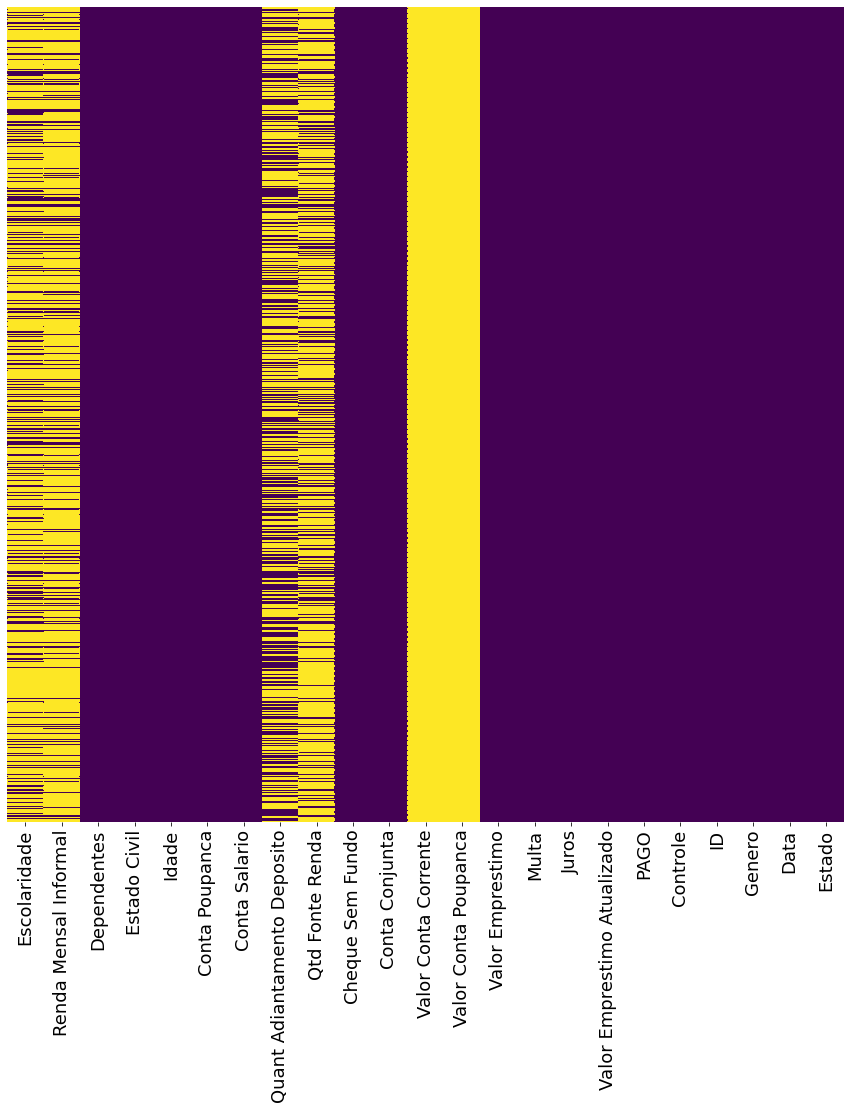

In [814]:
plt.figure(figsize=(15,15))
null_viz = sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
null_viz.set_xticklabels(null_viz.get_xmajorticklabels(), fontsize = 18)

In [815]:
figure = null_viz.get_figure()    
figure.savefig('null.png', dpi=400)

In [816]:
percent_missing = df.isnull().sum() * 100 / len(df)

In [817]:
percent_missing[percent_missing != 0]

Escolaridade                    70.996229
Renda Mensal Informal           80.615201
Quant Adiantamento Deposito     56.652114
Qtd Fonte Renda                 74.586227
Valor Conta Corrente           100.000000
Valor Conta Poupanca           100.000000
dtype: float64

In [818]:
df_clean = df.copy()

In [819]:
get_dummies_list = ["Dependentes","Conta Poupanca","Conta Salario","Cheque Sem Fundo","Conta Conjunta"]

for item in get_dummies_list:
    df_clean[item] = pd.get_dummies(df_clean[item], drop_first = True)

df_clean[get_dummies_list].head()

,Dependentes,Conta Poupanca,Conta Salario,Cheque Sem Fundo,Conta Conjunta
0,1,1,0,0,0
1,0,1,0,1,0
2,1,1,0,1,0
3,0,0,0,0,0
4,1,1,0,0,0


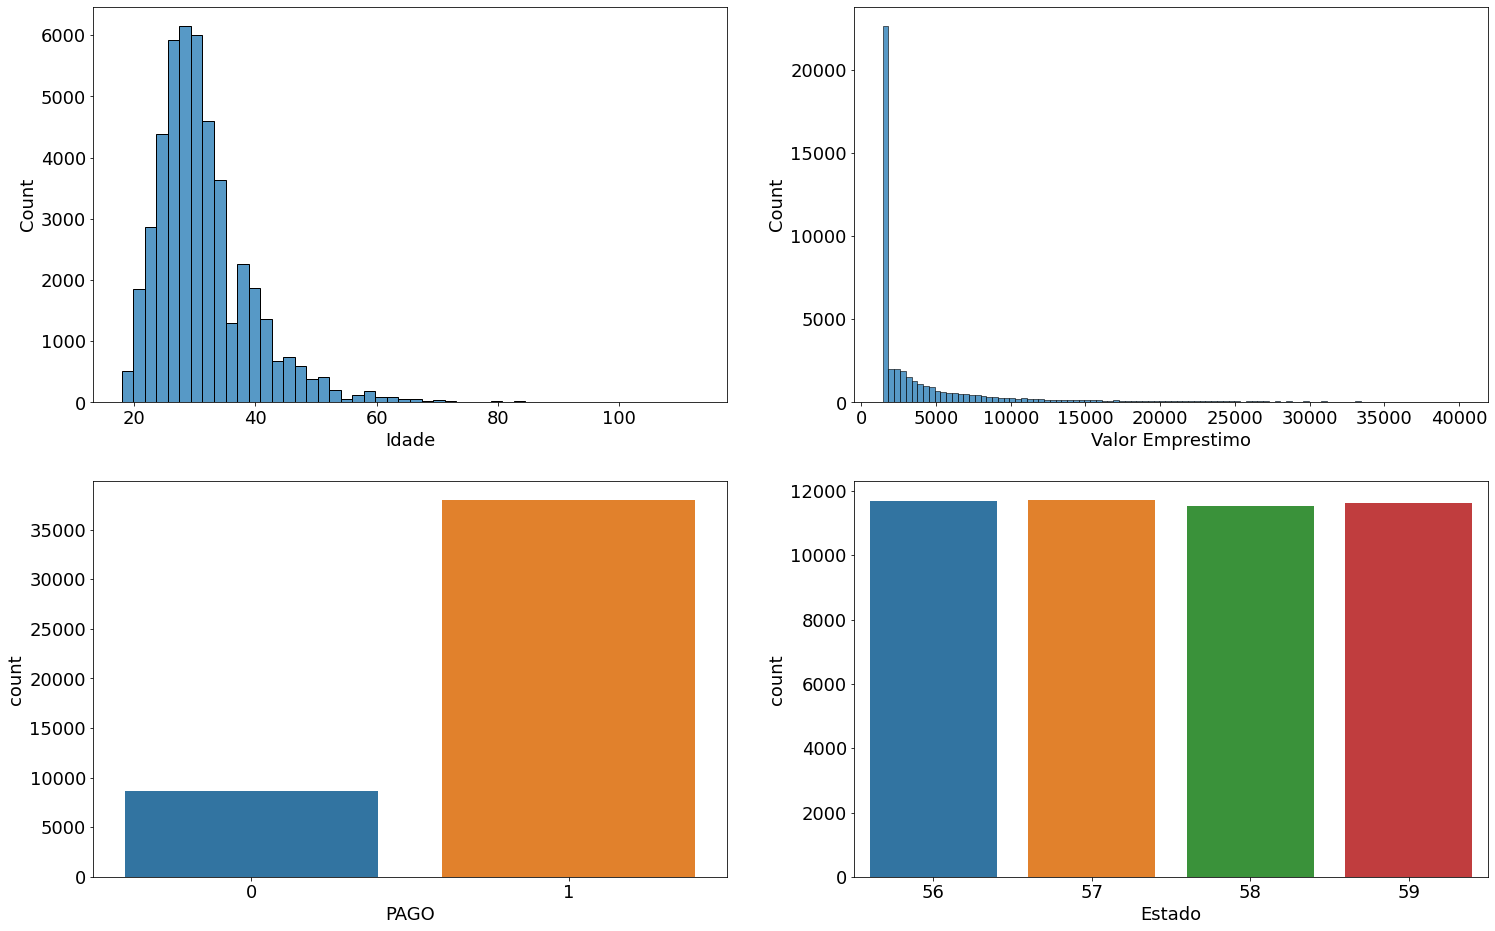

In [808]:
fig, axs = plt.subplots(ncols = 2, nrows= 2)
fig.set_figheight(16)
fig.set_figwidth(25)
sns.histplot(df_clean["Idade"].dropna(),bins = 50,ax = axs[0][0])
sns.histplot(df_clean["Valor Emprestimo"].dropna(),bins = 100,ax = axs[0][1])
sns.countplot(x = df_clean["PAGO"].dropna(),ax = axs[1][0])
sns.countplot(x = df_clean["Estado"].dropna(),ax = axs[1][1])

[Text(0, 0.5, 'Escolaridade'),
 Text(0, 1.5, 'Renda Mensal Informal'),
 Text(0, 2.5, 'Dependentes'),
 Text(0, 3.5, 'Estado Civil'),
 Text(0, 4.5, 'Idade'),
 Text(0, 5.5, 'Conta Poupanca'),
 Text(0, 6.5, 'Conta Salario'),
 Text(0, 7.5, 'Quant Adiantamento Deposito'),
 Text(0, 8.5, 'Qtd Fonte Renda'),
 Text(0, 9.5, 'Cheque Sem Fundo'),
 Text(0, 10.5, 'Conta Conjunta'),
 Text(0, 11.5, 'Valor Emprestimo'),
 Text(0, 12.5, 'Multa'),
 Text(0, 13.5, 'Juros'),
 Text(0, 14.5, 'Valor Emprestimo Atualizado'),
 Text(0, 15.5, 'PAGO'),
 Text(0, 16.5, 'ID'),
 Text(0, 17.5, 'Genero'),
 Text(0, 18.5, 'Estado')]

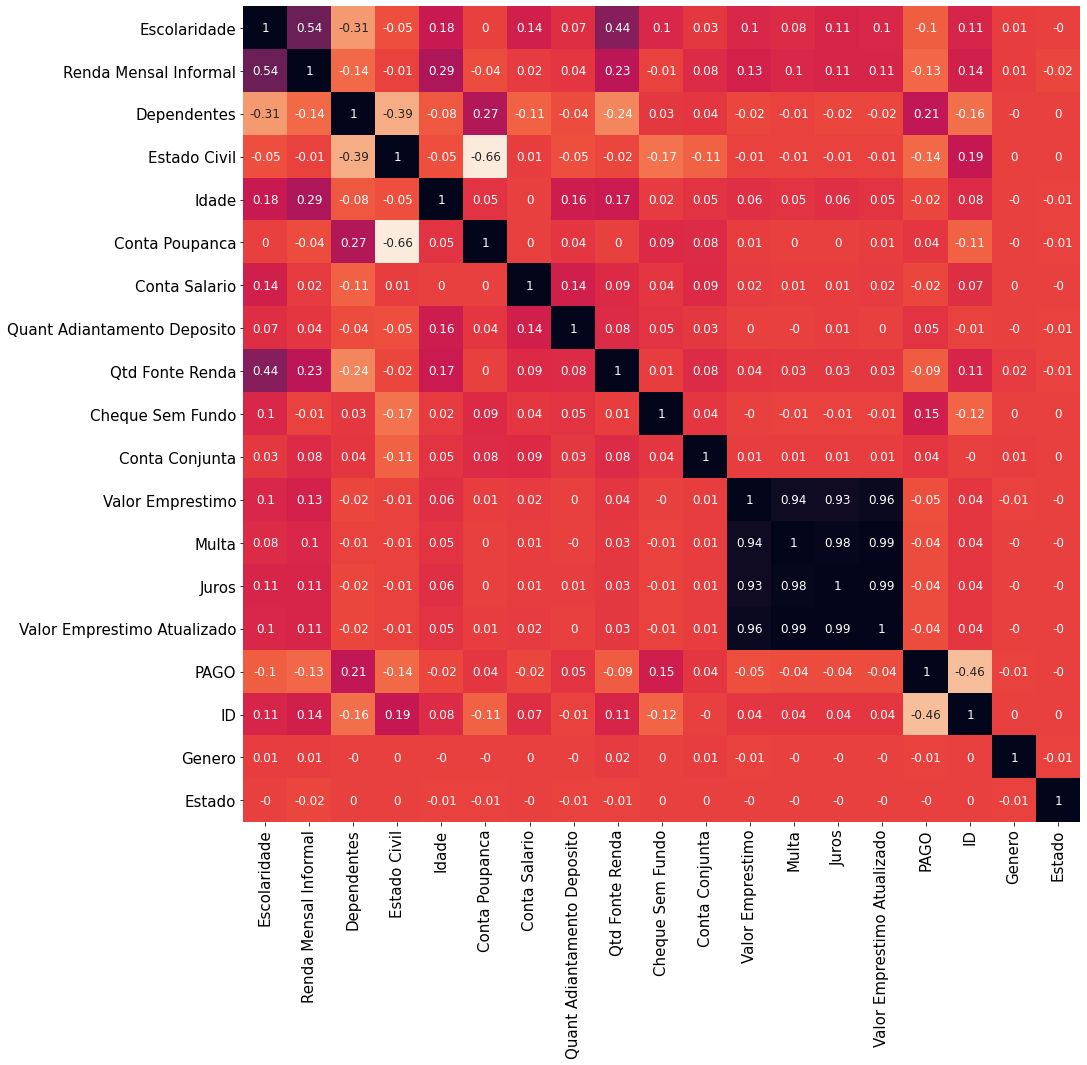

In [820]:
plt.figure(figsize=(15,15))
corr_map = sns.heatmap(round(df_clean.drop(columns = ["Valor Conta Corrente","Valor Conta Poupanca","Controle"]).corr(),2),cmap = "rocket_r",annot= True,cbar = False ,annot_kws={"fontsize":12})
corr_map.set_xticklabels(corr_map.get_xmajorticklabels(), fontsize = 15)
corr_map.set_yticklabels(corr_map.get_ymajorticklabels(), fontsize = 15)

In [821]:
df_clean.corr()["PAGO"].abs().sort_values(ascending=False)

PAGO                           1.000000
ID                             0.458284
Dependentes                    0.206950
Cheque Sem Fundo               0.154657
Estado Civil                   0.143398
Renda Mensal Informal          0.131826
Escolaridade                   0.098572
Qtd Fonte Renda                0.085403
Quant Adiantamento Deposito    0.054287
Valor Emprestimo               0.045821
Conta Conjunta                 0.040406
Valor Emprestimo Atualizado    0.038874
Juros                          0.037139
Multa                          0.037019
Conta Poupanca                 0.035233
Conta Salario                  0.024361
Idade                          0.021859
Genero                         0.006936
Estado                         0.003797
Valor Conta Corrente                NaN
Valor Conta Poupanca                NaN
Controle                            NaN
Name: PAGO, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



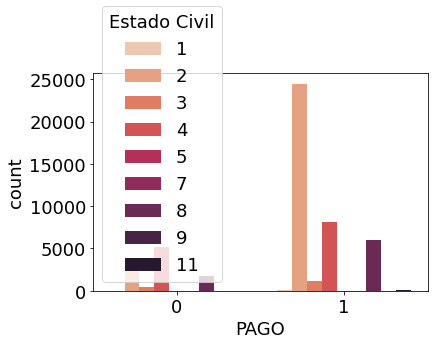

In [822]:
sns.countplot(df_clean["PAGO"], hue=df_clean["Estado Civil"],palette='rocket_r')

No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



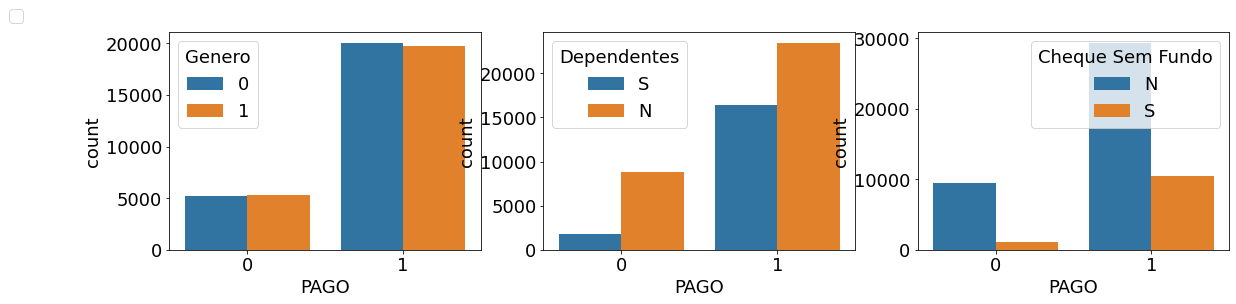

In [823]:
fig, axs = plt.subplots(ncols = 3)
fig.set_figwidth(19)
fig.legend(loc = 'upper left')
sns.countplot(df["PAGO"], hue=df["Genero"],ax = axs[0])
sns.countplot(df["PAGO"], hue=df["Dependentes"],ax = axs[1])
sns.countplot(df["PAGO"], hue=df["Cheque Sem Fundo"],ax = axs[2])


In [824]:
possible_outliers = ['Renda Mensal Informal', 'Valor Emprestimo', 'Multa', 'Juros', 'Valor Emprestimo Atualizado']
df_clean[possible_outliers].describe()

,Renda Mensal Informal,Valor Emprestimo,Multa,Juros,Valor Emprestimo Atualizado
count,9768.000000,5.039000e+04,5.039000e+04,5.039000e+04,5.039000e+04
mean,4635.610641,5.198927e+04,6.022658e+04,6.485391e+04,1.721779e+05
std,24776.361024,1.588819e+06,2.843941e+06,2.728170e+06,7.058290e+06
min,0.009600,1.431000e+03,0.000000e+00,0.000000e+00,1.441500e+03
25%,28.173400,1.593000e+03,1.325675e+02,2.742725e+02,2.840910e+03
50%,186.004900,2.298035e+03,6.489650e+02,1.143320e+03,5.609805e+03
75%,1159.021800,7.172175e+03,3.600000e+03,5.545427e+03,1.791325e+04
max,516960.779100,2.867894e+08,5.737759e+08,5.703619e+08,1.430927e+09


No handles with labels found to put in legend.


[Text(0, 0, '0')]

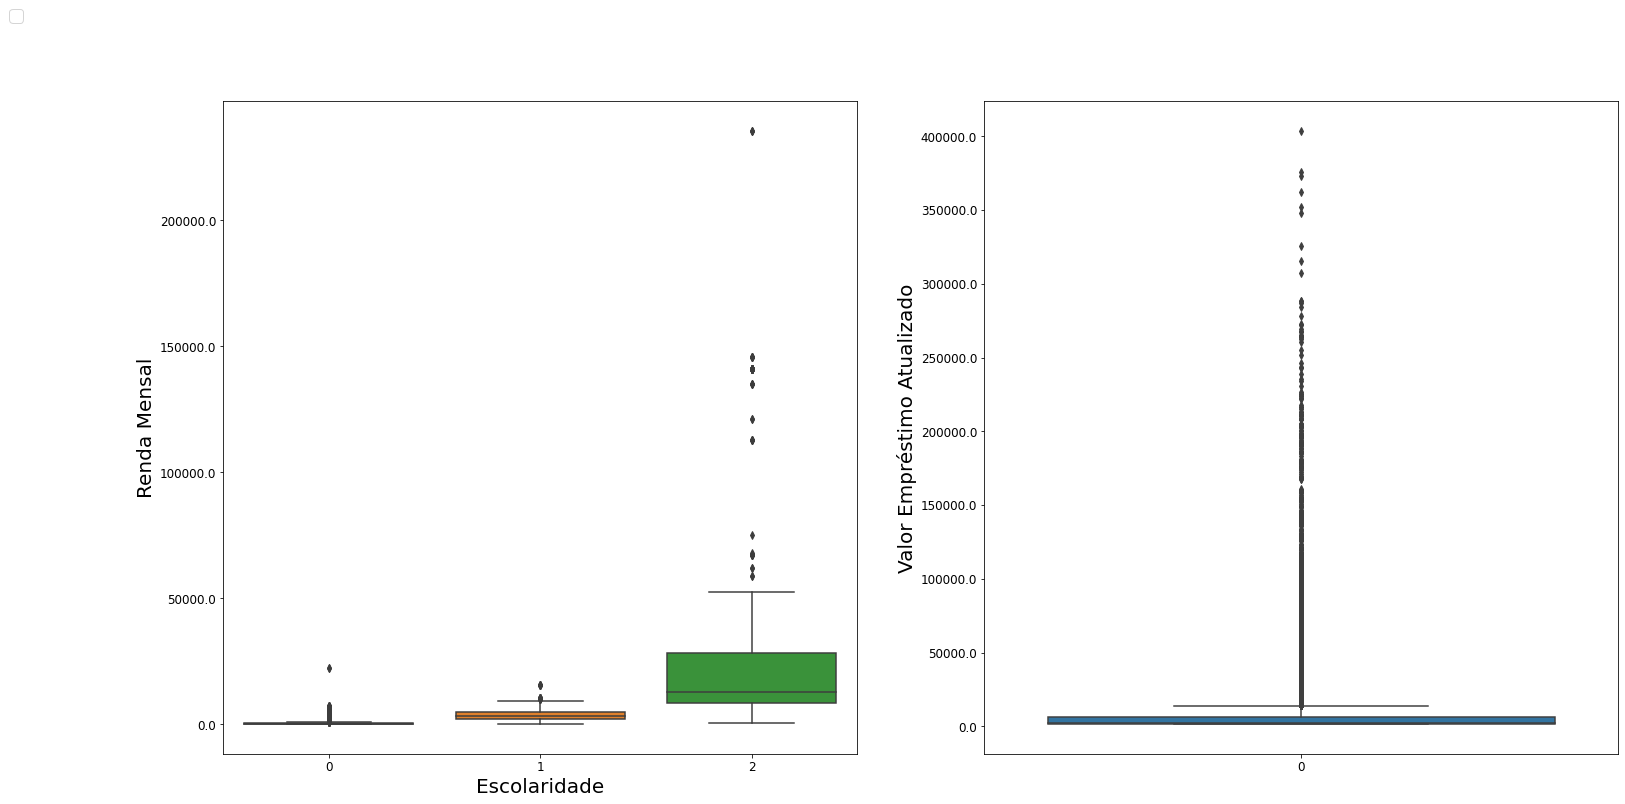

In [825]:
fig, axs = plt.subplots(ncols = 2, nrows= 1)
fig.set_figwidth(25)
fig.set_figheight(12)
fig.legend(loc = 'upper left')
renda_mensal = sns.boxplot(y=df_clean["Renda Mensal Informal"],x = df_clean['Escolaridade'],ax = axs[0])
valor_emprestimo = sns.boxplot(y=df_clean["Valor Emprestimo"].loc[df_clean["Valor Emprestimo Atualizado"]<500000],ax = axs[1])
renda_mensal.set_ylabel('Renda Mensal', fontsize = 20)
valor_emprestimo.set_ylabel('Valor Empréstimo Atualizado', fontsize = 20)
renda_mensal.set_yticklabels(renda_mensal.get_yticks(),fontsize = 12)
valor_emprestimo.set_yticklabels(valor_emprestimo.get_yticks(),fontsize = 12)
renda_mensal.set_xlabel('Escolaridade', fontsize = 20)
#valor_emprestimo.set_xlabel('Escolaridade', fontsize = 20)
renda_mensal.set_xticklabels(renda_mensal.get_xticks(),fontsize = 12)
valor_emprestimo.set_xticklabels(valor_emprestimo.get_xticks(),fontsize = 12)

In [826]:
(df_clean['ID'].loc[df_clean["Valor Emprestimo"]>40000].count()/len(df_clean))*100

7.408215915856322

In [827]:
df_clean.drop(df_clean.loc[df_clean['Valor Emprestimo']>40000].index,inplace = True)
df_clean.drop(df_clean.loc[df_clean['Renda Mensal Informal']>50000].index,inplace = True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46576 entries, 0 to 50389
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Escolaridade                 13171 non-null  float64
 1   Renda Mensal Informal        8504 non-null   float64
 2   Dependentes                  46576 non-null  uint8  
 3   Estado Civil                 46576 non-null  int64  
 4   Idade                        46576 non-null  int64  
 5   Conta Poupanca               46576 non-null  uint8  
 6   Conta Salario                46576 non-null  uint8  
 7   Quant Adiantamento Deposito  19621 non-null  float64
 8   Qtd Fonte Renda              11357 non-null  float64
 9   Cheque Sem Fundo             46576 non-null  uint8  
 10  Conta Conjunta               46576 non-null  uint8  
 11  Valor Conta Corrente         0 non-null      float64
 12  Valor Conta Poupanca         0 non-null      float64
 13  Valor Emprestimo

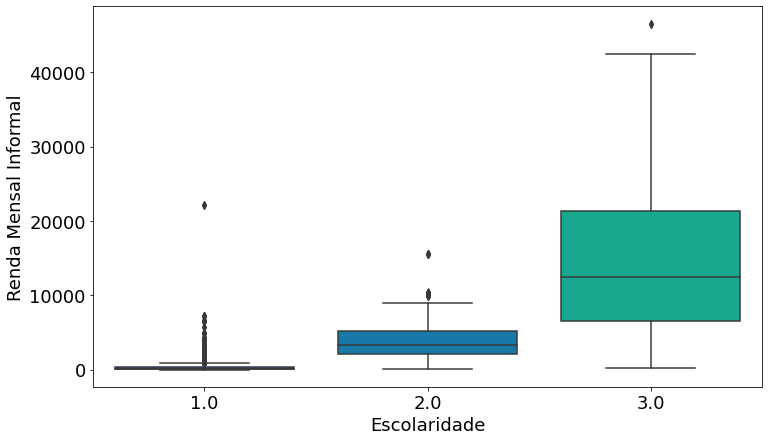

In [828]:
plt.figure(figsize=(12, 7))
sns.boxplot(y='Renda Mensal Informal',x='Escolaridade',data=df_clean,palette='winter')

In [829]:
df_clean.groupby("Escolaridade")["Renda Mensal Informal"].describe()

,count,mean,std,min,25%,50%,75%,max
Escolaridade,,,,,,,,
1.0,7274.0,363.250532,746.855078,0.0096,19.5000,96.9033,384.917650,22176.0000
2.0,653.0,3737.272119,2503.167151,28.7135,2095.4972,3295.4477,5151.243900,15579.6637
3.0,484.0,14915.991948,10465.530590,260.2578,6523.6851,12449.0335,21268.050825,46546.3824


In [830]:
df.isnull().groupby(['Escolaridade','Renda Mensal Informal']).size()

Escolaridade  Renda Mensal Informal
False         False                     9538
              True                      5077
True          False                      230
              True                     35545
dtype: int64

In [831]:
bins= [18,24,35,60,90]
labels = [1,2,3,4]
df_clean['AgeGroup'] = pd.cut(df_clean["Idade"], bins=bins, labels=labels, right=False)


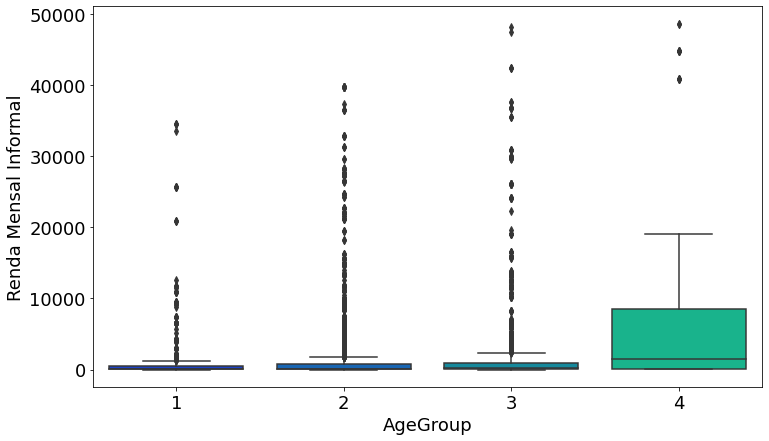

In [832]:
plt.figure(figsize=(12, 7))
sns.boxplot(y = "Renda Mensal Informal",x = "AgeGroup",data=df_clean,palette='winter')

In [833]:
def impute_renda(cols):
    Escol = cols[0]
    Renda = cols[1]
    
    if pd.isnull(Renda):

        if Escol == 1.0:
            return 390

        elif Escol == 2.0:
            return 4000

        elif Escol == 3.0:
            return 25000

        else:
            return np.nan

    else:
        return Renda

def impute_escol(cols):
    Escol = cols[0]
    Renda = cols[1]
    
    if pd.isnull(Escol):

        if Renda > 1 and Renda <= 500:
            return 1

        elif Renda > 500 and Renda <= 5000:
            return 2

        elif Renda > 5000 :
            return 3

        else:
            return np.NaN

    else:
        return Escol

In [834]:
df_clean['Renda Mensal Informal'] = df_clean[['Escolaridade','Renda Mensal Informal']].apply(impute_renda,axis=1)
df_clean['Escolaridade'] = df_clean[['Escolaridade','Renda Mensal Informal']].apply(impute_escol,axis=1)

In [835]:
df_clean['Escolaridade'].value_counts()

1.0    12027
2.0      690
3.0      520
Name: Escolaridade, dtype: int64

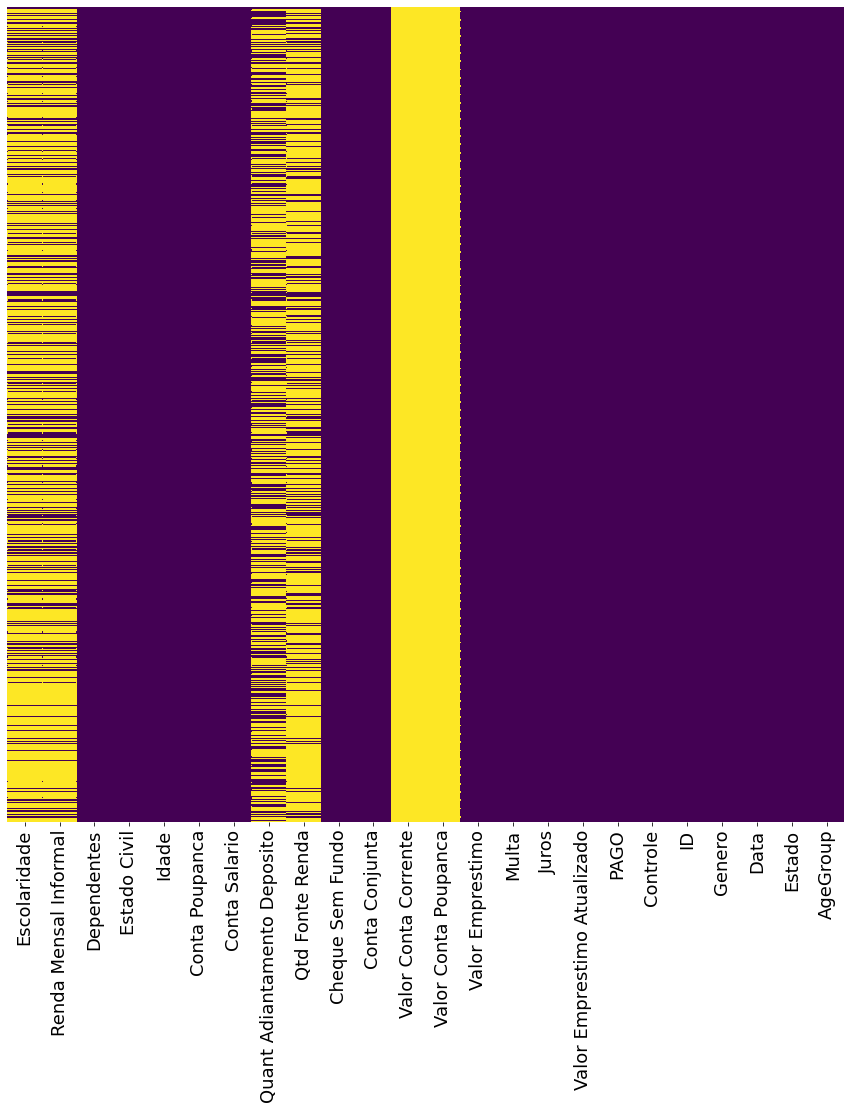

In [836]:
plt.figure(figsize=(15,15))
null_viz = sns.heatmap(df_clean.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [837]:
percent_missing = df_clean.isnull().sum() * 100 / len(df)
percent_missing

Escolaridade                   66.161937
Renda Mensal Informal          66.108355
Dependentes                     0.000000
Estado Civil                    0.000000
Idade                           0.000000
Conta Poupanca                  0.000000
Conta Salario                   0.000000
Quant Adiantamento Deposito    53.492756
Qtd Fonte Renda                69.892836
Cheque Sem Fundo                0.000000
Conta Conjunta                  0.000000
Valor Conta Corrente           92.431038
Valor Conta Poupanca           92.431038
Valor Emprestimo                0.000000
Multa                           0.000000
Juros                           0.000000
Valor Emprestimo Atualizado     0.000000
PAGO                            0.000000
Controle                        0.000000
ID                              0.000000
Genero                          0.000000
Data                            0.000000
Estado                          0.000000
AgeGroup                        0.043659
dtype: float64

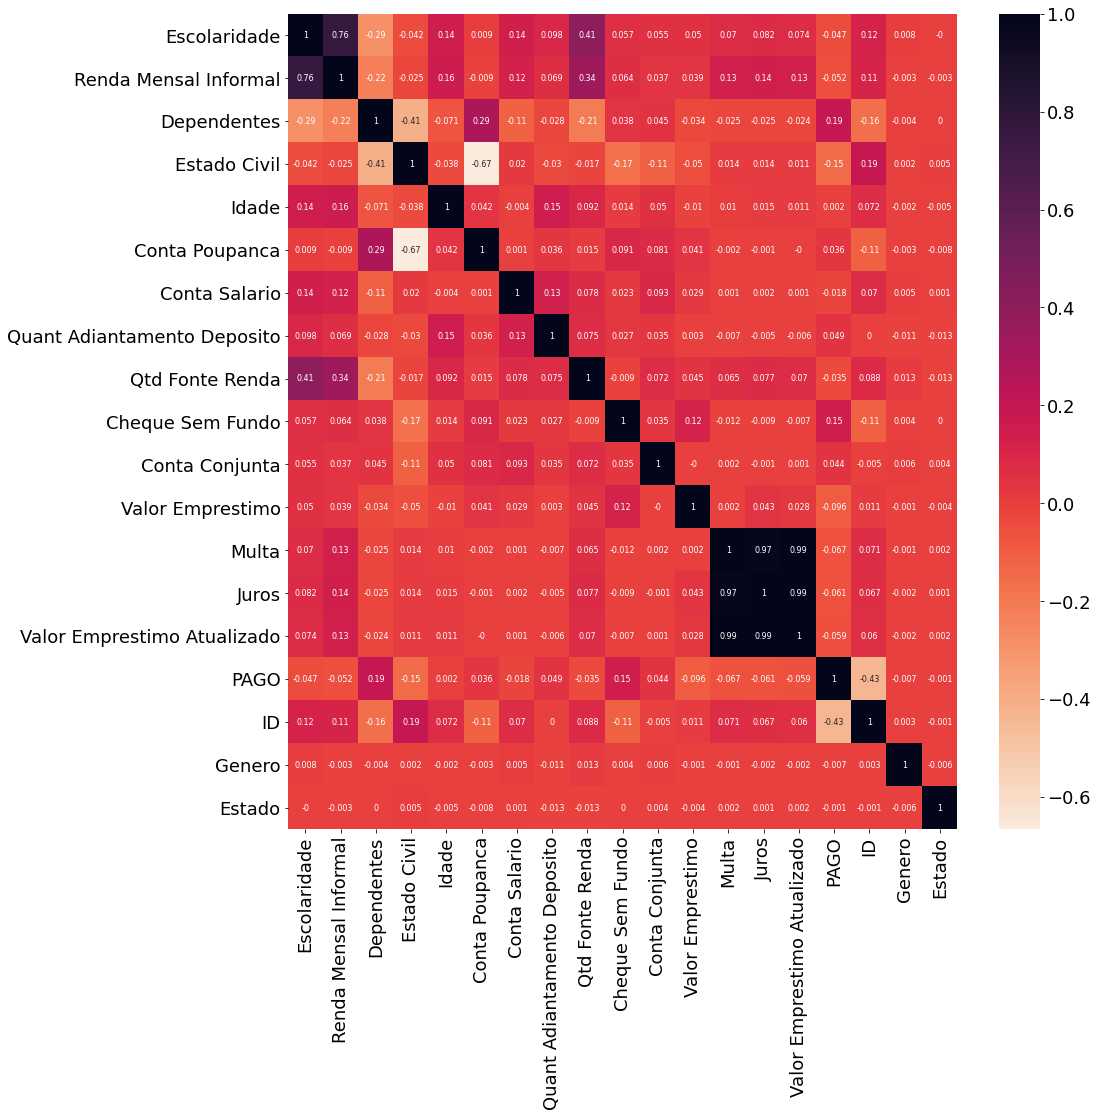

In [838]:
plt.figure(figsize=(15,15))
sns.heatmap(round(df_clean.drop(columns = ["Valor Conta Corrente","Valor Conta Poupanca","Controle"]).corr(),3),cmap = "rocket_r",annot= True,annot_kws={"fontsize":8})

In [839]:
df_clean.columns

Index(['Escolaridade', 'Renda Mensal Informal', 'Dependentes', 'Estado Civil',
       'Idade', 'Conta Poupanca', 'Conta Salario',
       'Quant Adiantamento Deposito', 'Qtd Fonte Renda', 'Cheque Sem Fundo',
       'Conta Conjunta', 'Valor Conta Corrente', 'Valor Conta Poupanca',
       'Valor Emprestimo', 'Multa', 'Juros', 'Valor Emprestimo Atualizado',
       'PAGO', 'Controle', 'ID', 'Genero', 'Data', 'Estado', 'AgeGroup'],
      dtype='object')

In [840]:
df_cleanv2 = df_clean[['Dependentes','Estado Civil','Idade','Conta Poupanca', 'Conta Salario',
                       'Cheque Sem Fundo','Conta Conjunta','Valor Emprestimo', 'Multa', 'Juros','PAGO']].dropna()
df_cleanv2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46576 entries, 0 to 50389
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependentes       46576 non-null  uint8  
 1   Estado Civil      46576 non-null  int64  
 2   Idade             46576 non-null  int64  
 3   Conta Poupanca    46576 non-null  uint8  
 4   Conta Salario     46576 non-null  uint8  
 5   Cheque Sem Fundo  46576 non-null  uint8  
 6   Conta Conjunta    46576 non-null  uint8  
 7   Valor Emprestimo  46576 non-null  float64
 8   Multa             46576 non-null  float64
 9   Juros             46576 non-null  float64
 10  PAGO              46576 non-null  int64  
dtypes: float64(3), int64(3), uint8(5)
memory usage: 2.7 MB


In [841]:
#X = df_clean[['Escolaridade', 'Renda Mensal Informal','Dependentes', 'Estado Civil','Cheque Sem Fundo','Valor Emprestimo','Multa','Juros']]
X = df_cleanv2.drop(columns = ['PAGO'])
y = df_cleanv2['PAGO']
y.head()

0    1
3    1
4    1
5    1
6    1
Name: PAGO, dtype: int64

In [842]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,rfc_pred))

In [ ]:
print(classification_report(y_test,rfc_pred))

In [805]:
rfc.score(X_test,y_test)

0.8670292707364202

In [806]:
probabilities = pd.DataFrame(data = rfc.predict_proba(X_test), columns = ["Não Pago","Pago"])
probabilities

,Não Pago,Pago
0,0.608667,0.391333
1,0.034000,0.966000
2,0.010000,0.990000
3,0.538000,0.462000
4,0.620000,0.380000
...,...,...
13968,0.138000,0.862000
13969,0.070000,0.930000
13970,0.042000,0.958000
13971,0.114000,0.886000


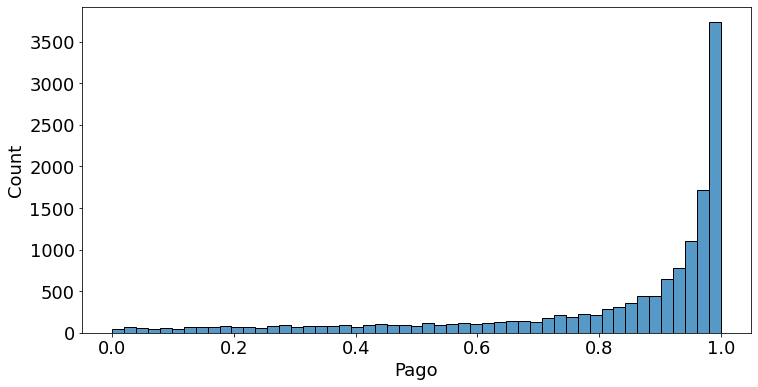

In [807]:
plt.figure(figsize = (12,6))
prob_pago = sns.histplot(x = "Pago",data = probabilities)